# Part 2- EDA , Pre-Process, Simple CNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Open CSV File from Part1

In [3]:
data = pd.read_csv("FinalData.csv", delimiter=';')

In [4]:
data.head(5)

,TMDB ID,poster path,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,337167,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,269149,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,299536,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,354912,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,427641,/30oXQKwibh0uANGMs0Sytw3uN22.jpg,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Exploratory Data Analysis

In [5]:
# drop "tmdb_id" column
genres = data.drop(["TMDB ID","poster path"], axis=1)

# generate correlation matrix
corrmat = genres.corr()

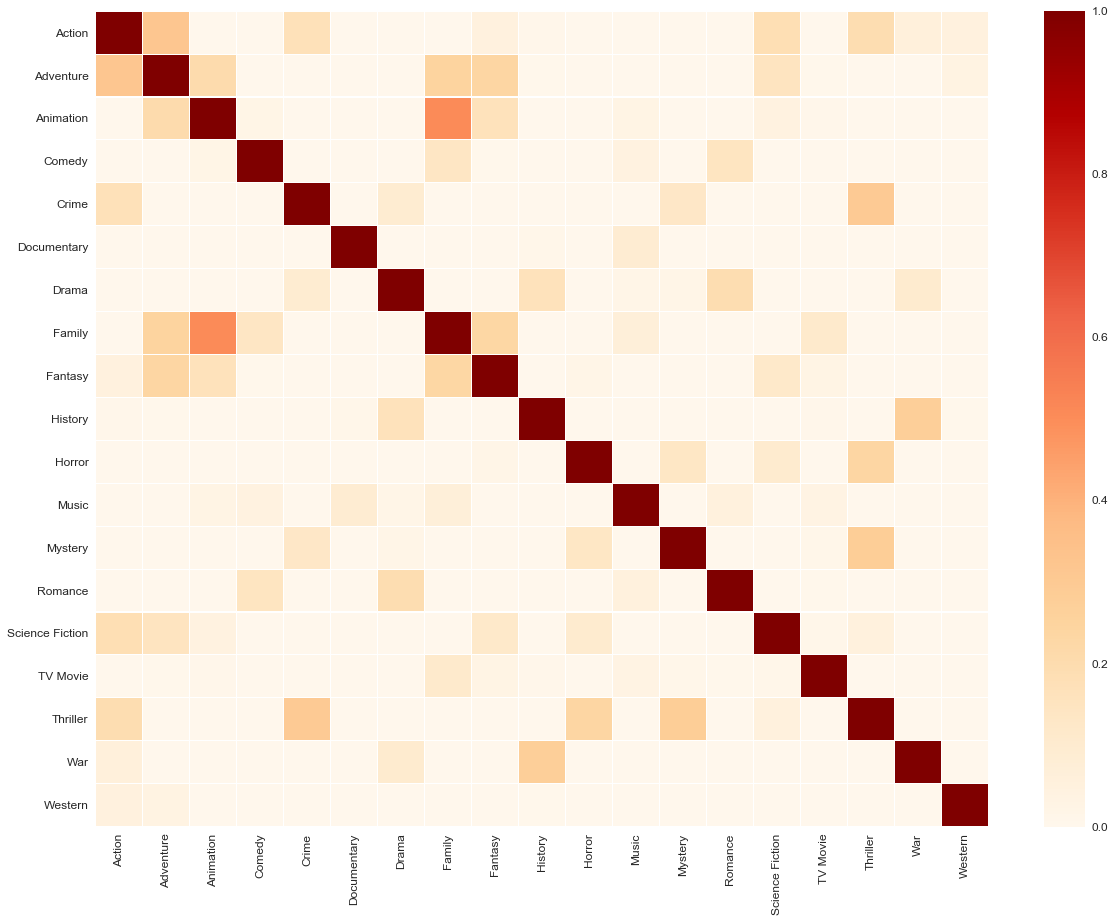

In [7]:
plt.subplots(figsize=(20,15))
# set appropriate font and dpi
sns.set(font_scale=1.2)
sns.set_style({"savefig.dpi": 100})

# plot heatmap
ax = sns.heatmap(corrmat, linewidths=.1, vmin=1, vmax=0,cmap="OrRd")

In [8]:
print (len(genres["Action"]))

11062


In [10]:
count=0
for i in range(len(genres["Action"])):
    y=genres.iloc[i]
    if(y["History"]==1 and y["War"]==1):
        count=count+1
print (count,genres["History"].sum())

112 415


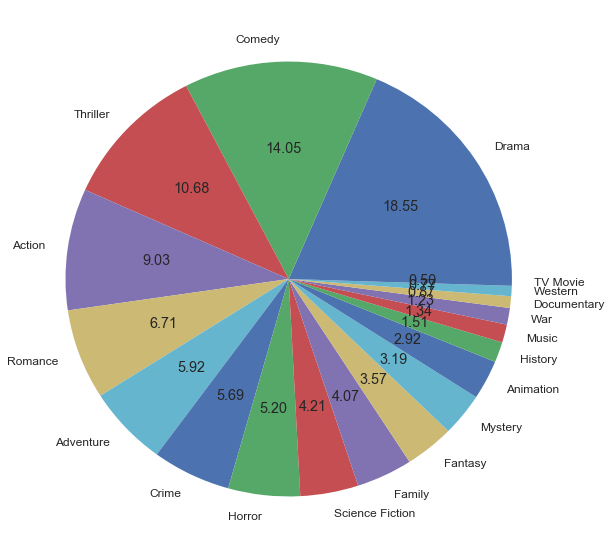

In [11]:
values=genres.sum()
#sort=sorted(values,reverse=True)
list2=values.keys()
list1=values.get_values()
list1, list2 = (list(x) for x in zip(*sorted(zip(list1, list2), key=lambda pair: pair[0])))

list1.reverse()
list2.reverse()
plt.figure(figsize=(10,10));
labels=list(genres)

plt.pie(list1, labels=list2, autopct='%.2f');

# Remove Genres that are not as Popular

In [6]:
genres=data.drop(["TV Movie","Western","Documentary","War","Music","History","Animation","Mystery","Fantasy","Family"], axis=1)
genres.head(10)

,TMDB ID,poster path,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Science Fiction,Thriller
0,337167,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,0,0,0,0,1,0,1,0,0
1,269149,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,0,1,1,0,0,0,0,0,0
2,299536,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,1,1,0,0,0,0,0,1,0
3,354912,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,0,1,1,0,0,0,0,0,0
4,427641,/30oXQKwibh0uANGMs0Sytw3uN22.jpg,1,1,0,0,0,0,0,1,0
5,284054,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,1,1,0,0,0,0,0,1,0
6,321612,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,0,0,0,0,0,0,1,0,0
7,181808,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,0,1,0,0,0,0,0,1,0
8,447332,/nAU74GmpUk7t5iklEp3bufwDq4n.jpg,0,0,0,0,1,1,0,1,1
9,198663,/coss7RgL0NH6g4fC2s5atvf3dFO.jpg,1,0,0,0,0,0,0,1,1


### Remove any Empty Rows

In [7]:
sumRow=genres[["Action","Adventure","Comedy","Crime","Drama","Horror","Romance","Science Fiction","Thriller"]].sum(axis=1)
Remove=[]
print(len(sumRow))
for i in range(len(sumRow)):
    if(sumRow[i]==0):
        Remove.append(i)
genres=genres.drop(Remove)
print(genres.shape)

11062
(10590, 11)


In [8]:
genres.head(10)

,TMDB ID,poster path,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Science Fiction,Thriller
0,337167,/jjPJ4s3DWZZvI4vw8Xfi4Vqa1Q8.jpg,0,0,0,0,1,0,1,0,0
1,269149,/sM33SANp9z6rXW8Itn7NnG1GOEs.jpg,0,1,1,0,0,0,0,0,0
2,299536,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,1,1,0,0,0,0,0,1,0
3,354912,/eKi8dIrr8voobbaGzDpe8w0PVbC.jpg,0,1,1,0,0,0,0,0,0
4,427641,/30oXQKwibh0uANGMs0Sytw3uN22.jpg,1,1,0,0,0,0,0,1,0
5,284054,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,1,1,0,0,0,0,0,1,0
6,321612,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,0,0,0,0,0,0,1,0,0
7,181808,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,0,1,0,0,0,0,0,1,0
8,447332,/nAU74GmpUk7t5iklEp3bufwDq4n.jpg,0,0,0,0,1,1,0,1,1
9,198663,/coss7RgL0NH6g4fC2s5atvf3dFO.jpg,1,0,0,0,0,0,0,1,1


In [10]:
PieKeep=genres.drop(["TMDB ID","poster path"],axis=1)
PieKeep.head(5)

,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Science Fiction,Thriller
0,0,0,0,0,1,0,1,0,0
1,0,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0


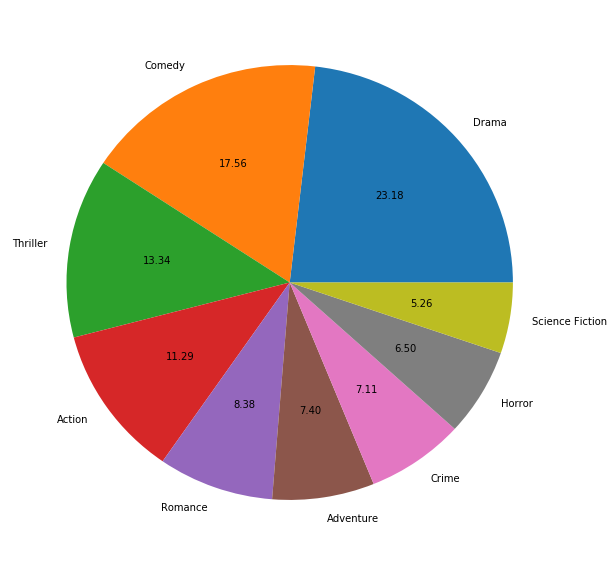

In [11]:
values=PieKeep.sum()
#sort=sorted(values,reverse=True)
list2=values.keys()
list1=values.get_values()
list1, list2 = (list(x) for x in zip(*sorted(zip(list1, list2), key=lambda pair: pair[0])))

list1.reverse()
list2.reverse()
plt.figure(figsize=(10,10));
labels=list(genres)

plt.pie(list1, labels=list2, autopct='%.2f');

# Preprocess Images and CNN only 5000

In [120]:
import glob
import scipy.misc 


from PIL import Image
from PIL import ImageEnhance
import PIL.ImageOps

In [121]:
VALIDATION_PERCENT = .2
TEST_PERCENT = .2
IMAGE_WIDTH = 154
IMAGE_HEIGHT=154
IMAGE_SIZE=154
NUM_CHANNELS = 3 # RGB channels
PIXEL_DEPTH = 255.0
NUM_GENRES = 9
NUM_ROWS=5000
PARTITION_TEST = False

In [122]:
def read_image_from_file(file_path):
    img = Image.open(file_path).convert('RGB')
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT), Image.ANTIALIAS) #downsample image
    pixel_values = np.array(img.getdata())
    return np.reshape(pixel_values, [IMAGE_WIDTH,IMAGE_HEIGHT, NUM_CHANNELS])
def scale_pixel_values(dataset):
    return (dataset - PIXEL_DEPTH / 2.0) / PIXEL_DEPTH

## Create Randomization


In [123]:
import random 

randomIndex=list(range(0,10590))
random.shuffle(randomIndex)

### Load Pictures in (TRAIN X) and (TRAIN Y) 

In [124]:
count=0
X_Train=np.ndarray((NUM_ROWS,IMAGE_WIDTH,IMAGE_HEIGHT,3), dtype=np.float32)
y_Train=np.ndarray((NUM_ROWS,NUM_GENRES), dtype=int)
for i in randomIndex[:5000]:
    temp=genres.iloc[i]
    path="Pictures/"+str(temp["TMDB ID"])+".jpg"
    img=read_image_from_file(path)
    X_Train[count]=img
    labels=np.asarray(temp[2:].values)
    #print(labels)
    y_Train[count]=labels
    count=count+1
    if count%100==0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


### Load Pictures in (test X) and (test Y) 

In [125]:
count=0
X_Test=np.ndarray((1000,IMAGE_WIDTH,IMAGE_HEIGHT,3), dtype=np.float32)
y_Test=np.ndarray((1000,NUM_GENRES), dtype=int)
for i in randomIndex[5000:6000]:
    temp=genres.iloc[i]
    path="Pictures/"+str(temp["TMDB ID"])+".jpg"
    img=read_image_from_file(path)
    X_Test[count]=img
    labels=np.asarray(temp[2:].values)
    #print(labels)
    y_Test[count]=labels
    count=count+1
    if count%100==0:
        print(count)

100
200
300
400
500
600
700
800
900
1000


In [126]:
print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)

(5000, 154, 154, 3)
(5000, 9)
(1000, 154, 154, 3)
(1000, 9)


In [127]:
X_Train=scale_pixel_values(X_Train)
X_Test=scale_pixel_values(X_Test)

In [128]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [129]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 40
# this is fixed, we have 9 output classes
num_classes = NUM_GENRES
classes = NUM_GENRES

In [130]:
model = Sequential()
# input: 154x154 images with 3 channels -> (154, 154, 3) tensors.
# this applies 64 convolution filters of size 3x3 each.
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_GENRES,activation='sigmoid'))

# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 64)      4864      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 70, 70, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 32)        0         
__________

In [131]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [132]:
model.fit(X_Train,y_Train, batch_size=batch_size, epochs=5,
          verbose=1, validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/5
4500/4500 [==============================] - 1477s 328ms/step - loss: 0.5397 - acc: 0.7515 - val_loss: 0.5024 - val_acc: 0.7840
Epoch 2/5
4500/4500 [==============================] - 1475s 328ms/step - loss: 0.5080 - acc: 0.7680 - val_loss: 0.4821 - val_acc: 0.7771
Epoch 3/5
4500/4500 [==============================] - 1467s 326ms/step - loss: 0.5001 - acc: 0.7731 - val_loss: 0.4765 - val_acc: 0.7829
Epoch 4/5
4500/4500 [==============================] - 1444s 321ms/step - loss: 0.4927 - acc: 0.7745 - val_loss: 0.4824 - val_acc: 0.7791
Epoch 5/5
4500/4500 [==============================] - 1441s 320ms/step - loss: 0.4861 - acc: 0.7784 - val_loss: 0.4749 - val_acc: 0.7851


In [133]:
model_name = "model_E1.json"
model_weights = "model_E1.h5"

model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)
    
# Store weights
model.save_weights(model_weights)

print("Saved model and weights")

Saved model and weights


# Predict and Actual Visual

In [134]:
pred = model.predict((X_Test))

In [135]:
score, acc = model.evaluate(X_Test, y_Test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

1000/1000 [==============================] - 129s 129ms/step
Test score: 0.4857832431793213
Test accuracy: 0.7822221970558166


In [140]:
movies = pd.read_csv("tmdbMovies.csv", delimiter=';', error_bad_lines=False, skip_blank_lines =True,encoding = "ISO-8859-1")
movies = movies[np.isfinite(movies['genre count'])]
slc=["TMDB ID","genre count"]
movies=movies.astype({c: int for c in slc})

b'Skipping line 8821: expected 6 fields, saw 7\n'


In [141]:
qwerty=list(genres.iloc[randomIndex[5000:6000]]["TMDB ID"])

In [164]:
GenreList=["Action","Adventure","Comedy","Crime","Drama","Horror","Romance","Science Fiction","Thriller"]
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
movies.set_index("TMDB ID", inplace=True)

In [172]:
def showImage(Id,index):
    holding=movies.loc[Id]
    print("Title is ", holding["title"])
    hold=holding["Genres"].split("~")
    hold=hold[1:]
    hold = [item.strip() for item in hold]
    actualGenres=""
    for i in hold:
        if i in GenreList:
            actualGenres=actualGenres+i+"|"
            
    print("Actual Genres ", actualGenres)
    temp=pred[index]
    stringGenres=""
    for a, b in zip(temp, GenreList):
        if(a>0.47):
            stringGenres=stringGenres+b+" "+str(a)+"|"

    print("Predicted Genres ",stringGenres)
    img = PIL.Image.open("Pictures/"+str(Id)+".jpg")
    plt.axis('off')
    plt.imshow(img)

# Examples of Predicted Genres on Testing data

Title is  Hannah Montana: The Movie
Actual Genres  Comedy|Drama|Romance|
Predicted Genres  Comedy 0.62773037|Drama 0.49435213|


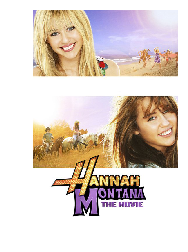

In [144]:
showImage(qwerty[1],1)

Title is  Get the Gringo
Actual Genres  Action|Thriller|Crime|Drama|
Predicted Genres  Drama 0.5114915|


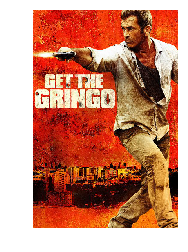

In [151]:
showImage(qwerty[100],100)

Title is  Angela's Ashes
Actual Genres  Drama|
Predicted Genres  Drama 0.58878183|


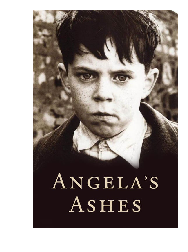

In [152]:
showImage(qwerty[200],200)

Title is  My Old Lady
Actual Genres  Romance|Comedy|Drama|
Predicted Genres  Comedy 0.5920966|Drama 0.45117188|


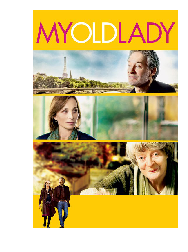

In [153]:
showImage(qwerty[300],300)

Title is  The Fury
Actual Genres  Horror|Science Fiction|Thriller|
Predicted Genres  Drama 0.5276876|Thriller 0.47157255|


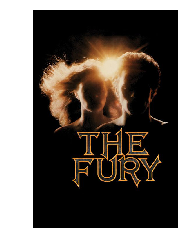

In [154]:
showImage(qwerty[400],400)

Title is  ËQuí© culpa tiene el nií±o?
Actual Genres  Comedy|Romance|
Predicted Genres  Comedy 0.48203298|Drama 0.4950449|


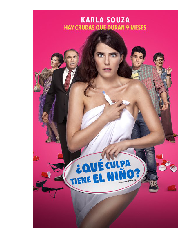

In [155]:
showImage(qwerty[600],600)

Title is  Encino Man
Actual Genres  Comedy|
Predicted Genres  Comedy 0.5924874|Drama 0.51681286|


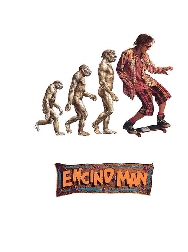

In [166]:
showImage(qwerty[702],702)

Title is  Night Shadows
Actual Genres  Horror|Science Fiction|Thriller|
Predicted Genres  Drama 0.5091635|Thriller 0.4808335|


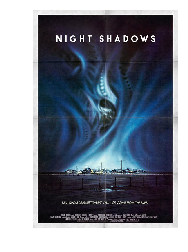

In [157]:
showImage(qwerty[800],800)

Title is  My Cousin Vinny
Actual Genres  Comedy|Drama|
Predicted Genres  Drama 0.47323376|Thriller 0.47266954|


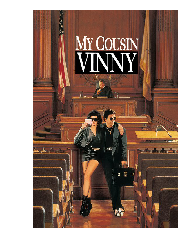

In [158]:
showImage(qwerty[900],900)

Title is  Street Fighter
Actual Genres  Action|Adventure|Thriller|
Predicted Genres  


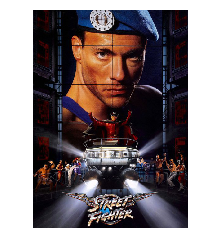

In [168]:
showImage(qwerty[123],123)

Title is  Strange Brew
Actual Genres  Comedy|
Predicted Genres  Comedy 0.5124926|


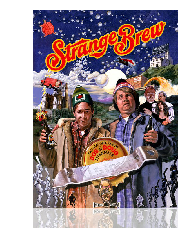

In [170]:
showImage(qwerty[456],456)

Title is  Blame It on Rio
Actual Genres  Comedy|Romance|
Predicted Genres  Comedy 0.53207546|


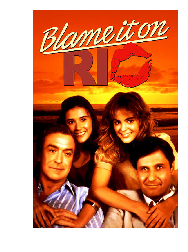

In [171]:
showImage(qwerty[789],789)

Title is  The Seven-Per-Cent Solution
Actual Genres  Thriller|
Predicted Genres  Comedy 0.559883|Drama 0.48040846|



Title is  Hannah Montana: The Movie
Actual Genres  Comedy|Drama|Romance|
Predicted Genres  Comedy 0.62773037|Drama 0.49435213|



Title is  Omen III: The Final Conflict
Actual Genres  Drama|Horror|Thriller|
Predicted Genres  Drama 0.47696215|Thriller 0.4670269|



Title is  Beyond Skyline
Actual Genres  Action|Science Fiction|
Predicted Genres  



Title is  The Tragedy of Macbeth
Actual Genres  Drama|
Predicted Genres  Drama 0.5179203|Thriller 0.47899583|



Title is  99 Homes
Actual Genres  Drama|
Predicted Genres  Drama 0.4797721|Thriller 0.45540938|



Title is  Ex
Actual Genres  Comedy|
Predicted Genres  Comedy 0.69927424|Drama 0.46661273|



Title is  Death Wish
Actual Genres  Action|Crime|Drama|Thriller|
Predicted Genres  Comedy 0.458108|Drama 0.522632|



Title is  NÛ_co z Alenky
Actual Genres  Comedy|Horror|
Predicted Genres  Drama 0.4876029|



Title is  Red H




Title is  Ü»ÜÜéÜÜ¿ _é_ï_»_é£¿I __Ü¬Îµ
Actual Genres  Action|Adventure|
Predicted Genres  Drama 0.4995592|



Title is  Frank & Lola
Actual Genres  Drama|Romance|
Predicted Genres  Drama 0.49686396|



Title is  _Î__¬Á
Actual Genres  Action|Comedy|
Predicted Genres  Drama 0.5057348|



Title is  Mr. & Mrs. Smith
Actual Genres  Action|Comedy|Drama|Thriller|
Predicted Genres  Comedy 0.6114508|Drama 0.53853583|



Title is  Vacanze di Natale a Cortina
Actual Genres  Comedy|
Predicted Genres  Comedy 0.7630041|



Title is  Camille redouble
Actual Genres  Comedy|Romance|
Predicted Genres  Comedy 0.55230266|Drama 0.50851053|



Title is  The Forgotten Ones
Actual Genres  Drama|Horror|
Predicted Genres  Drama 0.46852633|Thriller 0.5056113|



Title is  CASSHERN
Actual Genres  Drama|Horror|Science Fiction|
Predicted Genres  Drama 0.5249496|



Title is  Brick Mansions
Actual Genres  Action|Crime|Drama|
Predicted Genres  Drama 0.45717236|



Title is  The Poseidon Adventu




Title is  If I Stay
Actual Genres  Drama|
Predicted Genres  Drama 0.5633188|



Title is  Ace Ventura Jr: Pet Detective
Actual Genres  Comedy|
Predicted Genres  Comedy 0.65259755|Drama 0.51262605|



Title is  The Best Years of Our Lives
Actual Genres  Drama|Romance|
Predicted Genres  Comedy 0.6337371|Drama 0.5004089|



Title is  Patriot Games
Actual Genres  Drama|Action|Thriller|Crime|
Predicted Genres  Drama 0.5201355|Thriller 0.4914845|



Title is  Shadow Dancer
Actual Genres  Thriller|
Predicted Genres  Drama 0.5141723|Thriller 0.4999777|



Title is  Kondom des Grauens
Actual Genres  Comedy|Horror|
Predicted Genres  Drama 0.5012098|



Title is  The Limits of Control
Actual Genres  Crime|Drama|Thriller|
Predicted Genres  Drama 0.5357649|Thriller 0.49044934|



Title is  Tom Jones
Actual Genres  Adventure|Comedy|Romance|
Predicted Genres  Comedy 0.64255095|Drama 0.48182324|



Title is  Kevin Hart: What Now?
Actual Genres  Comedy|
Predicted Genres  



Title is  Chinese Zodiac




Title is  Balls of Fury
Actual Genres  Comedy|Crime|
Predicted Genres  Comedy 0.60195607|Drama 0.4558664|



Title is  Infestation
Actual Genres  Action|Comedy|Horror|Science Fiction|
Predicted Genres  Comedy 0.5836035|Drama 0.5183914|



Title is  Cube
Actual Genres  Thriller|Science Fiction|
Predicted Genres  Drama 0.5049568|



Title is  Meet the Parents
Actual Genres  Comedy|Romance|
Predicted Genres  Comedy 0.6616554|Drama 0.4583951|



Title is  La marií©e í©tait en noir
Actual Genres  Drama|Romance|Thriller|Crime|
Predicted Genres  Drama 0.48632988|Thriller 0.47220156|



Title is  The Show
Actual Genres  Drama|
Predicted Genres  Drama 0.4523022|



Title is  Ferris Bueller's Day Off
Actual Genres  Comedy|
Predicted Genres  Comedy 0.70669365|Drama 0.4598091|



Title is  The Distinguished Gentleman
Actual Genres  Comedy|
Predicted Genres  Drama 0.54794633|



Title is  Heartbreakers
Actual Genres  Crime|Comedy|Romance|
Predicted Genres  Comedy 0.6618447|Drama 0.5171117|



Ti




Title is  Salem Witch Trials
Actual Genres  Drama|
Predicted Genres  Drama 0.5151856|Thriller 0.4971489|



Title is  Without a Paddle
Actual Genres  Action|Adventure|Comedy|Thriller|
Predicted Genres  



Title is  Surrogates
Actual Genres  Action|Science Fiction|Thriller|
Predicted Genres  Drama 0.4725651|



Title is  Moonraker
Actual Genres  Action|Adventure|Thriller|Science Fiction|
Predicted Genres  Drama 0.5357876|



Title is  Johnny Stecchino
Actual Genres  Comedy|
Predicted Genres  Comedy 0.5544924|Drama 0.56412566|



Title is  La Doublure
Actual Genres  Comedy|
Predicted Genres  Comedy 0.6265754|Drama 0.48457366|



Title is  A Nightmare on Elm Street 4: The Dream Master
Actual Genres  Horror|Thriller|
Predicted Genres  Drama 0.523876|



Title is  Angí©lique  Marquise Des Anges
Actual Genres  Adventure|Romance|
Predicted Genres  Comedy 0.5926319|Drama 0.5310093|



Title is  A View to a Kill
Actual Genres  Adventure|Action|Thriller|
Predicted Genres  Drama 0.537094|








Title is  Proyecto Líçzaro
Actual Genres  Science Fiction|
Predicted Genres  Drama 0.51293665|Thriller 0.48315212|



Title is  Electric Dreams
Actual Genres  Comedy|Drama|
Predicted Genres  Drama 0.53538764|Thriller 0.48413208|



Title is  The Marine
Actual Genres  Action|Adventure|Drama|Thriller|
Predicted Genres  Drama 0.5394491|



Title is  Kit Kittredge: An American Girl
Actual Genres  Comedy|Drama|
Predicted Genres  Comedy 0.73876035|



Title is  The SpongeBob Movie: Sponge Out of Water
Actual Genres  Adventure|Comedy|
Predicted Genres  Comedy 0.7954254|



Title is  Say Anything...
Actual Genres  Comedy|Drama|Romance|
Predicted Genres  Comedy 0.6400156|Drama 0.4950723|



Title is  Confessions of a Teenage Jesus Jerk
Actual Genres  Comedy|Romance|Drama|
Predicted Genres  Comedy 0.51648456|Drama 0.4638148|



Title is  Mona Lisa
Actual Genres  Crime|Drama|Romance|
Predicted Genres  Drama 0.5027387|Thriller 0.46937016|



Title is  New Jack City
Actual Genres  Thriller|Crime




Title is  AríÂs
Actual Genres  Drama|Thriller|Science Fiction|
Predicted Genres  Drama 0.47047928|



Title is  Screamers
Actual Genres  Horror|Science Fiction|
Predicted Genres  Drama 0.4885719|



Title is  Free Willy
Actual Genres  Adventure|
Predicted Genres  Comedy 0.51445|Drama 0.5392862|



Title is  The Color Purple
Actual Genres  Drama|
Predicted Genres  Drama 0.5179394|



Title is  Michael Clayton
Actual Genres  Drama|Crime|Thriller|
Predicted Genres  Drama 0.46475652|Thriller 0.45147434|



Title is  Godzilla  King of the Monsters!
Actual Genres  Science Fiction|Horror|
Predicted Genres  Comedy 0.5107987|Drama 0.47214952|



Title is  Barbershop
Actual Genres  Comedy|Drama|
Predicted Genres  Comedy 0.5489395|



Title is  Spring Breakers
Actual Genres  Drama|Crime|
Predicted Genres  Comedy 0.95475835|



Title is  Strangerland
Actual Genres  Drama|Thriller|
Predicted Genres  Drama 0.5101769|



Title is  The Boy in the Striped Pyjamas
Actual Genres  Drama|
Predicted Genr




Title is  îÂÎË_£Í
Actual Genres  Drama|Thriller|
Predicted Genres  Drama 0.4683698|Thriller 0.4676704|



Title is  Enchanted Christmas
Actual Genres  Romance|
Predicted Genres  Drama 0.52027184|



Title is  Novocaine
Actual Genres  Comedy|Crime|Thriller|
Predicted Genres  Drama 0.5543534|



Title is  Shaft in Africa
Actual Genres  Adventure|Action|Thriller|Crime|
Predicted Genres  Comedy 0.50650847|Drama 0.5118598|



Title is  Ca$h
Actual Genres  Crime|Thriller|Comedy|
Predicted Genres  Drama 0.49229753|



Title is  (T)Raumschiff Surprise - Periode 1
Actual Genres  Comedy|Science Fiction|
Predicted Genres  Drama 0.4757816|



Title is  Arctic Blast
Actual Genres  Science Fiction|
Predicted Genres  Drama 0.49337277|



Title is  Free Fall
Actual Genres  Drama|Thriller|Action|
Predicted Genres  Drama 0.46093467|Thriller 0.47394198|



Title is  13 Eerie
Actual Genres  Horror|Thriller|
Predicted Genres  Drama 0.47968295|Thriller 0.5025909|



Title is  2 Guns
Actual Genres  Acti




Title is  Herbie Goes To Monte Carlo
Actual Genres  Romance|Comedy|Action|Adventure|
Predicted Genres  Comedy 0.6385086|Drama 0.4834261|



Title is  Thanks for Sharing
Actual Genres  Comedy|Drama|
Predicted Genres  Comedy 0.5698945|Drama 0.53836024|



Title is  Urban Legend
Actual Genres  Horror|Thriller|
Predicted Genres  Drama 0.5132894|



Title is  Wake of Death
Actual Genres  Action|Adventure|Thriller|
Predicted Genres  Drama 0.47206265|



Title is  The Librarian: Return to King Solomon's Mines
Actual Genres  Action|Adventure|
Predicted Genres  Drama 0.49989924|



Title is  Î«åóÎ_»Â__î__Öô
Actual Genres  Action|Adventure|Comedy|Crime|
Predicted Genres  Comedy 0.74706316|Drama 0.4540221|



Title is  The Revenant
Actual Genres  Comedy|Horror|
Predicted Genres  Drama 0.4819417|Thriller 0.49353695|



Title is  Margot at the Wedding
Actual Genres  Comedy|Drama|
Predicted Genres  Comedy 0.5729877|Drama 0.5467736|



Title is  R.I.P.D.
Actual Genres  Action|Comedy|Crime|
P




Title is  Howling III: The Marsupials
Actual Genres  Comedy|Horror|
Predicted Genres  Drama 0.4890642|



Title is  XIII
Actual Genres  Drama|Thriller|
Predicted Genres  Drama 0.50138545|



Title is  Nurse Betty
Actual Genres  Comedy|Crime|Thriller|
Predicted Genres  Comedy 0.6106608|Drama 0.48541903|



Title is  Immortals
Actual Genres  Action|Drama|
Predicted Genres  Drama 0.50931925|



Title is  __Á__ÇóÜÂÜÇÜçÜ_Ü_ÜÈÜÈÜ_ Î_ÎæÇ DEATH & REBIRTH ÜÜ__Áîô
Actual Genres  Drama|Science Fiction|
Predicted Genres  Drama 0.48080385|



Title is  The King of Comedy
Actual Genres  Comedy|Drama|
Predicted Genres  Comedy 0.61997074|Drama 0.5031468|



Title is  Doctor Dolittle
Actual Genres  Adventure|Comedy|
Predicted Genres  Comedy 0.6580581|



Title is  Stand Up Guys
Actual Genres  Thriller|Comedy|Action|
Predicted Genres  Comedy 0.48121735|Drama 0.4921807|



Title is  Marvel One-Shot: Item 47
Actual Genres  Science Fiction|Action|
Predicted Genres  Drama 0.452684|Thri




Title is  Ostwind
Actual Genres  Adventure|
Predicted Genres  



Title is  Behind the Candelabra
Actual Genres  Drama|Romance|
Predicted Genres  



Title is  Stasis
Actual Genres  Adventure|Science Fiction|
Predicted Genres  



Title is  She's All That
Actual Genres  Comedy|Romance|
Predicted Genres  Drama 0.530278|



Title is  The ABCs of Death
Actual Genres  Horror|
Predicted Genres  Thriller 0.47130135|



Title is  Welcome to Me
Actual Genres  Comedy|Drama|
Predicted Genres  Comedy 0.6034716|Drama 0.5193695|



Title is  Lara Croft: Tomb Raider
Actual Genres  Adventure|Action|Thriller|
Predicted Genres  



Title is  Jaws 3-D
Actual Genres  Thriller|Horror|
Predicted Genres  



Title is  Hush
Actual Genres  Thriller|Horror|Action|
Predicted Genres  Drama 0.5363865|Thriller 0.4525665|



Title is  Shrek Forever After
Actual Genres  Comedy|Adventure|
Predicted Genres  Comedy 0.62092984|



Title is  Open Season
Actual Genres  Adventure|Comedy|
Predicted Genres  Comedy 0.69999




Title is  The Chronicles of Narnia: Prince Caspian
Actual Genres  Adventure|
Predicted Genres  Comedy 0.65696424|



Title is  Dark Victory
Actual Genres  Drama|Romance|
Predicted Genres  Drama 0.55837154|



Title is  __Ü¬ÜóÜÜæÜ
Actual Genres  Action|Comedy|Drama|Romance|
Predicted Genres  Drama 0.544986|



Title is  Flowers in the Attic
Actual Genres  Drama|Horror|Thriller|
Predicted Genres  Drama 0.49716163|Thriller 0.45177242|



Title is  R.T.T.
Actual Genres  Comedy|
Predicted Genres  Comedy 0.6887332|



Title is  The Riot Club
Actual Genres  Drama|Thriller|
Predicted Genres  Drama 0.5054247|



Title is  The Substitute 2: School's Out
Actual Genres  Action|Thriller|
Predicted Genres  Drama 0.48449093|



Title is  Kubo and the Two Strings
Actual Genres  Adventure|
Predicted Genres  Drama 0.45410353|



Title is  Tesis
Actual Genres  Horror|Thriller|
Predicted Genres  Drama 0.51072973|



Title is  The Immigrant
Actual Genres  Drama|Romance|
Predicted Genres  Drama 0




Title is  The A-Team
Actual Genres  Thriller|Action|Adventure|Comedy|Crime|
Predicted Genres  Drama 0.45340165|



Title is  Lonely Hearts
Actual Genres  Drama|Thriller|Crime|Romance|
Predicted Genres  Drama 0.5140941|



Title is  ö_åö__ö_ö«ó 2
Actual Genres  Action|Romance|Thriller|
Predicted Genres  Drama 0.4993115|



Title is  Fríçgiles
Actual Genres  Horror|Thriller|
Predicted Genres  Drama 0.511302|Thriller 0.48078954|





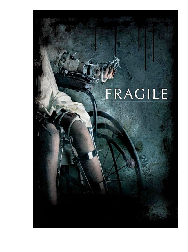

In [150]:
for i in range(0,1000):
    showImage(qwerty[i],i)
    print("\n\n")

In [174]:
np.savetxt("pred.csv", pred, delimiter=",", fmt='%s',)

In [175]:
np.savetxt("ids.csv", qwerty, delimiter=",", fmt='%s',)